# 3. Machine Learning Models

### Libraries

In [2]:
## pandas and Numpy
import pandas as pd
import numpy as np
## Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
## Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
## Others
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

### Importing the data

In [58]:
df = pd.read_csv('clean_data_for_ml.csv')

In [148]:
df.head(3)

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Total_Income_Catg,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Bad_Debt_Catg,Total_Good_Debt,Debt_Score,Debit_Score_Catg,Status
0,5008806,M,1,1,0,112500,Poor,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2,59,4,0,No bad dept,30,30,Very Good,1
1,5008808,F,0,1,0,270000,Upper Middle Class,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,53,9,0,No bad dept,5,5,Poor,1
2,5008809,F,0,1,0,270000,Upper Middle Class,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,53,9,0,No bad dept,5,5,Poor,1


### Info and data description

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Total_Income_Catg     25128 non-null  object
 7   Income_Type           25128 non-null  object
 8   Education_Type        25128 non-null  object
 9   Family_Status         25128 non-null  object
 10  Housing_Type          25128 non-null  object
 11  Owned_Mobile_Phone    25128 non-null  int64 
 12  Owned_Work_Phone      25128 non-null  int64 
 13  Owned_Phone           25128 non-null  int64 
 14  Owned_Email           25128 non-null  int64 
 15  Job_Title             25128 non-null

In [61]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Applicant_ID,25128.0,5.078835e+06,41943.777736,5008806.0,5042225.75,5079004.0,5115603.25,5150487.0
Owned_Car,25128.0,4.183779e-01,0.493303,0.0,0.00,0.0,1.00,1.0
Owned_Realty,25128.0,6.549268e-01,0.475402,0.0,0.00,1.0,1.00,1.0
Total_Children,25128.0,5.094715e-01,0.762937,0.0,0.00,0.0,1.00,5.0
Total_Income,25128.0,1.948365e+05,104521.123300,27000.0,135000.00,180000.0,225000.00,1575000.0
Owned_Mobile_Phone,25128.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
Owned_Work_Phone,25128.0,2.737584e-01,0.445895,0.0,0.00,0.0,1.00,1.0
Owned_Phone,25128.0,2.927412e-01,0.455030,0.0,0.00,0.0,1.00,1.0
Owned_Email,25128.0,1.006845e-01,0.300916,0.0,0.00,0.0,0.00,1.0
Total_Family_Members,25128.0,2.291309e+00,0.928871,1.0,2.00,2.0,3.00,7.0


### Null value analysis

In [62]:
df.isnull().sum()

Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Total_Income_Catg       0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Bad_Debt_Catg     0
Total_Good_Debt         0
Debt_Score              0
Debit_Score_Catg        0
Status                  0
dtype: int64

### distributions and outliers

In [63]:
def distributions():
    for i in df.columns:
        if (df[i].dtypes != 'object') & (i != 'Applicant_ID'):
            print('\n')
            print(i)
            plt.figure(figsize=(12,5))
            sns.histplot(data = df, x = i,kde=True,color='b')
            plt.grid()
            plt.title(i)
            plt.show()
            
            plt.figure(figsize=(12,5))
            sns.boxplot(data = df, x = i,color='y')
            plt.grid()
            plt.title(i)
            plt.show()

In [64]:
# distributions()

### We can see that the data is imballanced for the target (Status)

### How much is the Target variable imbalanced ?

In [65]:
target_imbalance = pd.DataFrame(df.Status.value_counts())
target_imbalance['Percentage %'] = round(target_imbalance['Status'] / len(df),4)*100

In [66]:
target_imbalance['Class'] = target_imbalance.index

In [67]:
target_imbalance

,Status,Percentage %,Class
1,25007,99.52,1
0,121,0.48,0


### Inference : Basically, the CC is given to almost everyone who applies for it!

### Machine learning 

In [119]:
ml = df.copy()

In [120]:
ml.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Total_Income_Catg,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Bad_Debt_Catg,Total_Good_Debt,Debt_Score,Debit_Score_Catg,Status
0,5008806,M,1,1,0,112500,Poor,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2,59,4,0,No bad dept,30,30,Very Good,1
1,5008808,F,0,1,0,270000,Upper Middle Class,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,53,9,0,No bad dept,5,5,Poor,1
2,5008809,F,0,1,0,270000,Upper Middle Class,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,53,9,0,No bad dept,5,5,Poor,1
3,5008810,F,0,1,0,270000,Upper Middle Class,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,53,9,0,No bad dept,27,27,Good,1
4,5008811,F,0,1,0,270000,Upper Middle Class,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,53,9,0,No bad dept,39,39,Very Good,1


### Preprocessing all categorical columns to numericals

In [121]:
for i in ml.columns:
    if ml[i].dtype == 'O':
        print(i,':',df[i].nunique())

Applicant_Gender : 2
Total_Income_Catg : 4
Income_Type : 5
Education_Type : 5
Family_Status : 5
Housing_Type : 6
Job_Title : 18
Total_Bad_Debt_Catg : 5
Debit_Score_Catg : 5


In [122]:
ml['Applicant_Gender'] = ml['Applicant_Gender'].map({'M':1,'F':0})

In [123]:
tic_list = ml['Total_Income_Catg'].unique()
tic_id = np.arange(1,len(tic_list)+1)
ml['Total_Income_Catg'].replace(to_replace=tic_list, value=tic_id,inplace=True)

In [124]:
it_list = ml['Income_Type'].unique()
it_id = np.arange(1,len(it_list)+1)
ml['Income_Type'].replace(it_list,it_id,True)

In [125]:
et_list = ml['Education_Type'].unique()
et_id = np.arange(1,len(et_list)+1)
ml['Education_Type'].replace(et_list,et_id,True)

In [126]:
fs_list = ml['Family_Status'].unique()
fs_id = np.arange(1,len(fs_list)+1)
ml['Family_Status'].replace(fs_list,fs_id,True)

In [127]:
ht_list = ml['Housing_Type'].unique()
ht_id = np.arange(1,len(ht_list)+1)
ml['Housing_Type'].replace(ht_list,ht_id,True)

In [128]:
jt_list = ml['Job_Title'].unique()
jt_id = np.arange(1,len(jt_list)+1)
ml['Job_Title'].replace(jt_list,jt_id,True)

In [129]:
tbc_list = ml.Total_Bad_Debt_Catg.unique()
tbc_id = np.arange(1,len(tbc_list)+1)
ml['Total_Bad_Debt_Catg'].replace(tbc_list,tbc_id,True)

In [130]:
ds_list = ml['Debit_Score_Catg'].unique()
ds_id = np.arange(1,len(ds_list)+1)
ml['Debit_Score_Catg'].replace(ds_list,ds_id,True)

In [131]:
ml.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Total_Income_Catg,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Bad_Debt_Catg,Total_Good_Debt,Debt_Score,Debit_Score_Catg,Status
0,5008806,1,1,1,0,112500,1,1,1,1,1,1,0,0,0,1,2,59,4,0,1,30,30,1,1
1,5008808,0,0,1,0,270000,2,2,1,2,1,1,0,1,1,2,1,53,9,0,1,5,5,2,1
2,5008809,0,0,1,0,270000,2,2,1,2,1,1,0,1,1,2,1,53,9,0,1,5,5,2,1
3,5008810,0,0,1,0,270000,2,2,1,2,1,1,0,1,1,2,1,53,9,0,1,27,27,3,1
4,5008811,0,0,1,0,270000,2,2,1,2,1,1,0,1,1,2,1,53,9,0,1,39,39,1,1


In [132]:
ml.drop('Applicant_ID',axis=1,inplace=True)

In [133]:
x = ml.drop('Status',axis=1)
y = ml.Status

In [134]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15,random_state=42)

In [135]:
## models
lr = LogisticRegression()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
xgbrf = XGBRFClassifier()
cat = CatBoostClassifier(verbose=False)
lgb = LGBMClassifier()

### Logistics Regression

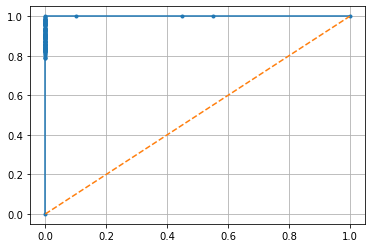

Accuracy : 1.0

ROC AUC Score : 1.0

Conf. Matrix :

 [[  20    0]
 [   0 3750]]

Classification Report :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00      3750

    accuracy                           1.00      3770
   macro avg       1.00      1.00      1.00      3770
weighted avg       1.00      1.00      1.00      3770



In [136]:
lr.fit(xtrain,ytrain)
lr_test_pred = lr.predict(xtest)
lr_test_pp = lr.predict_proba(xtest)
lr_test_pp = lr_test_pp[:,1]
## roccurve
fpr,tpr,thres = roc_curve(ytest,lr_test_pp)
plt.plot(fpr,tpr,marker='.',linestyle='-',label='model')
plt.plot([0,1],linestyle='--',label='50% line')
plt.grid()
plt.show()
lr_test_acc = accuracy_score(ytest,lr_test_pred)
lr_conf_mat = confusion_matrix(ytest,lr_test_pred)
lr_cr = classification_report(ytest,lr_test_pred)

print('Accuracy :',lr_test_acc)
print('\nROC AUC Score :',roc_auc_score(ytest,lr_test_pp))
print('\nConf. Matrix :\n\n',lr_conf_mat)
print('\nClassification Report :\n\n',lr_cr)

### KNN

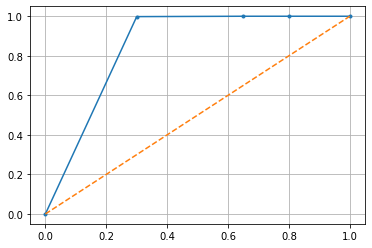

Accuracy : 0.9957559681697613

ROC AUC Score : 0.8493933333333333

Conf. Matrix :

 [[   4   16]
 [   0 3750]]

Classification Report :

               precision    recall  f1-score   support

           0       1.00      0.20      0.33        20
           1       1.00      1.00      1.00      3750

    accuracy                           1.00      3770
   macro avg       1.00      0.60      0.67      3770
weighted avg       1.00      1.00      0.99      3770



In [137]:
kn.fit(xtrain,ytrain)
kn_test_pred = kn.predict(xtest)
kn_test_pp = kn.predict_proba(xtest)
kn_test_pp = kn_test_pp[:,1]
## roccurve
fpr,tpr,thres = roc_curve(ytest,kn_test_pp)
plt.plot(fpr,tpr,marker='.',linestyle='-',label='model')
plt.plot([0,1],linestyle='--',label='50% line')
plt.grid()
plt.show()
kn_test_acc = accuracy_score(ytest,kn_test_pred)
kn_conf_mat = confusion_matrix(ytest,kn_test_pred)
kn_cr = classification_report(ytest,kn_test_pred)

print('Accuracy :',kn_test_acc)
print('\nROC AUC Score :',roc_auc_score(ytest,kn_test_pp))
print('\nConf. Matrix :\n\n',kn_conf_mat)
print('\nClassification Report :\n\n',kn_cr)

### Decision Tree

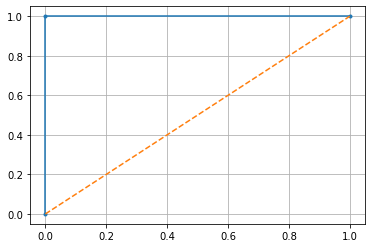

Accuracy : 1.0

ROC AUC Score : 1.0

Conf. Matrix :

 [[  20    0]
 [   0 3750]]

Classification Report :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00      3750

    accuracy                           1.00      3770
   macro avg       1.00      1.00      1.00      3770
weighted avg       1.00      1.00      1.00      3770


Feature Importances : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [138]:
dt.fit(xtrain,ytrain)
dt_test_pred = dt.predict(xtest)
dt_test_pp = dt.predict_proba(xtest)
dt_test_pp = dt_test_pp[:,1]
## roccurve
fpr,tpr,thres = roc_curve(ytest,dt_test_pp)
plt.plot(fpr,tpr,marker='.',linestyle='-',label='model')
plt.plot([0,1],linestyle='--',label='50% line')
plt.grid()
plt.show()
dt_test_acc = accuracy_score(ytest,dt_test_pred)
dt_conf_mat = confusion_matrix(ytest,dt_test_pred)
dt_cr = classification_report(ytest,dt_test_pred)

print('Accuracy :',dt_test_acc)
print('\nROC AUC Score :',roc_auc_score(ytest,dt_test_pp))
print('\nConf. Matrix :\n\n',dt_conf_mat)
print('\nClassification Report :\n\n',dt_cr)

print('\nFeature Importances :',dt.feature_importances_)

### Random Forest

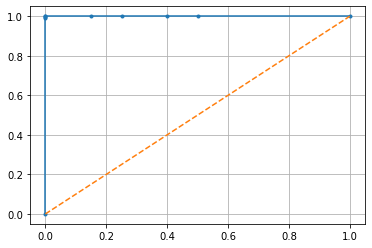

Accuracy : 1.0

ROC AUC Score : 1.0

Conf. Matrix :

 [[  20    0]
 [   0 3750]]

Classification Report :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00      3750

    accuracy                           1.00      3770
   macro avg       1.00      1.00      1.00      3770
weighted avg       1.00      1.00      1.00      3770


Feature Importances : [6.52455686e-04 1.14108521e-04 5.65205795e-04 1.17263634e-03
 4.38196468e-03 1.27645936e-03 4.04455884e-03 1.07576662e-03
 6.19481223e-04 4.64873445e-04 0.00000000e+00 5.60683614e-04
 2.07238233e-04 6.28563135e-04 4.53069432e-03 1.25788345e-03
 4.17293811e-03 3.78453292e-03 6.96594420e-02 4.40670448e-02
 3.76655737e-02 4.35804159e-01 3.83293736e-01]


In [139]:
rf.fit(xtrain,ytrain)
rf_test_pred = rf.predict(xtest)
rf_test_pp = rf.predict_proba(xtest)
rf_test_pp = rf_test_pp[:,1]
## roccurve
fpr,tpr,thres = roc_curve(ytest,rf_test_pp)
plt.plot(fpr,tpr,marker='.',linestyle='-',label='model')
plt.plot([0,1],linestyle='--',label='50% line')
plt.grid()
plt.show()
rf_test_acc = accuracy_score(ytest,rf_test_pred)
rf_conf_mat = confusion_matrix(ytest,rf_test_pred)
rf_cr = classification_report(ytest,rf_test_pred)

print('Accuracy :',rf_test_acc)
print('\nROC AUC Score :',roc_auc_score(ytest,rf_test_pp))
print('\nConf. Matrix :\n\n',rf_conf_mat)
print('\nClassification Report :\n\n',rf_cr)

print('\nFeature Importances :',rf.feature_importances_)

### Gradient Boosting

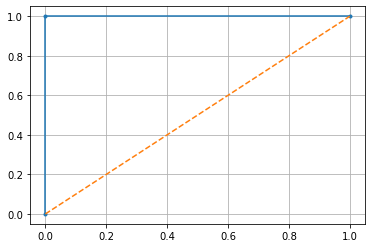

Accuracy : 1.0

ROC AUC Score : 1.0

Conf. Matrix :

 [[  20    0]
 [   0 3750]]

Classification Report :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00      3750

    accuracy                           1.00      3770
   macro avg       1.00      1.00      1.00      3770
weighted avg       1.00      1.00      1.00      3770


Feature Importances : [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.06872328e-05 9.99969313e-01]


In [140]:
gb.fit(xtrain,ytrain)
gb_test_pred = gb.predict(xtest)
gb_test_pp = gb.predict_proba(xtest)
gb_test_pp = gb_test_pp[:,1]
## roccurve
fpr,tpr,thres = roc_curve(ytest,gb_test_pp)
plt.plot(fpr,tpr,marker='.',linestyle='-',label='model')
plt.plot([0,1],linestyle='--',label='50% line')
plt.grid()
plt.show()
gb_test_acc = accuracy_score(ytest,gb_test_pred)
gb_conf_mat = confusion_matrix(ytest,gb_test_pred)
gb_cr = classification_report(ytest,gb_test_pred)

print('Accuracy :',gb_test_acc)
print('\nROC AUC Score :',roc_auc_score(ytest,gb_test_pp))
print('\nConf. Matrix :\n\n',gb_conf_mat)
print('\nClassification Report :\n\n',gb_cr)

print('\nFeature Importances :',gb.feature_importances_)

### XGB

[11:50:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


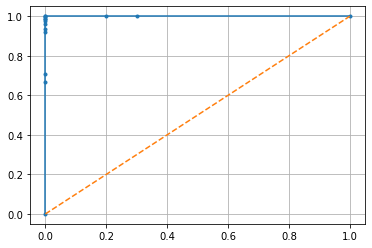

Accuracy : 1.0

ROC AUC Score : 1.0

Conf. Matrix :

 [[  20    0]
 [   0 3750]]

Classification Report :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00      3750

    accuracy                           1.00      3770
   macro avg       1.00      1.00      1.00      3770
weighted avg       1.00      1.00      1.00      3770


Feature Importances :
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.02335678 0.         0.         0.9611317  0.01551156]


In [141]:
xgb.fit(xtrain,ytrain)
xgb_test_pred = xgb.predict(xtest)
xgb_test_pp = xgb.predict_proba(xtest)
xgb_test_pp = xgb_test_pp[:,1]
## roccurve
fpr,tpr,thres = roc_curve(ytest,xgb_test_pp)
plt.plot(fpr,tpr,marker='.',linestyle='-',label='model')
plt.plot([0,1],linestyle='--',label='50% line')
plt.grid()
plt.show()
xgb_test_acc = accuracy_score(ytest,xgb_test_pred)
xgb_conf_mat = confusion_matrix(ytest,xgb_test_pred)
xgb_cr = classification_report(ytest,xgb_test_pred)

print('Accuracy :',xgb_test_acc)
print('\nROC AUC Score :',roc_auc_score(ytest,xgb_test_pp))
print('\nConf. Matrix :\n\n',xgb_conf_mat)
print('\nClassification Report :\n\n',xgb_cr)

print('\nFeature Importances :\n',xgb.feature_importances_)

### XGBRF

[11:50:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


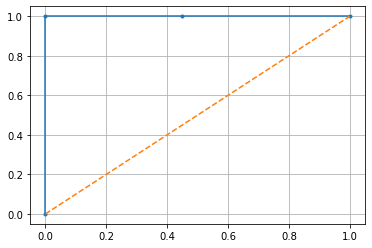

Accuracy : 1.0

ROC AUC Score : 1.0

Conf. Matrix :

 [[  20    0]
 [   0 3750]]

Classification Report :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00      3750

    accuracy                           1.00      3770
   macro avg       1.00      1.00      1.00      3770
weighted avg       1.00      1.00      1.00      3770


Feature Importances :
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.08452339 0.07157137 0.         0.43633753 0.40756768]


In [142]:

xgbrf.fit(xtrain,ytrain)
xgbrf_test_pred = xgbrf.predict(xtest)
xgbrf_test_pp = xgbrf.predict_proba(xtest)
xgbrf_test_pp = xgbrf_test_pp[:,1]
## roccurve
fpr,tpr,thres = roc_curve(ytest,xgbrf_test_pp)
plt.plot(fpr,tpr,marker='.',linestyle='-',label='model')
plt.plot([0,1],linestyle='--',label='50% line')
plt.grid()
plt.show()
xgbrf_test_acc = accuracy_score(ytest,xgbrf_test_pred)
xgbrf_conf_mat = confusion_matrix(ytest,xgbrf_test_pred)
xgbrf_cr = classification_report(ytest,xgbrf_test_pred)

print('Accuracy :',xgbrf_test_acc)
print('\nROC AUC Score :',roc_auc_score(ytest,xgbrf_test_pp))
print('\nConf. Matrix :\n\n',xgbrf_conf_mat)
print('\nClassification Report :\n\n',xgbrf_cr)

print('\nFeature Importances :\n',xgbrf.feature_importances_)

### CAT

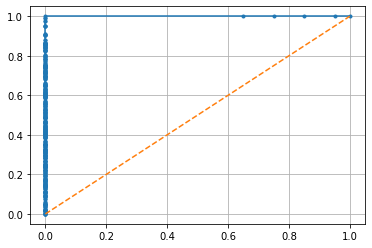

Accuracy : 1.0

ROC AUC Score : 1.0

Conf. Matrix :

 [[  20    0]
 [   0 3750]]

Classification Report :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00      3750

    accuracy                           1.00      3770
   macro avg       1.00      1.00      1.00      3770
weighted avg       1.00      1.00      1.00      3770


Feature Importances :
 [2.30513166e-01 4.13496332e-03 1.83782146e-01 2.90921566e+00
 3.87888819e+00 2.57993669e+00 1.52902615e+00 2.86431044e+00
 4.65368339e+00 2.68763247e+00 0.00000000e+00 7.68173575e-01
 6.05218669e-01 1.94017917e+00 5.81180473e+00 3.07240489e+00
 2.54327708e+00 4.08774318e+00 4.28890175e+00 1.40555514e+01
 5.78455853e+00 1.58929523e+01 1.96281114e+01]


In [143]:
cat.fit(xtrain,ytrain)
cat_test_pred = cat.predict(xtest)
cat_test_pp = cat.predict_proba(xtest)
cat_test_pp = cat_test_pp[:,1]
## roccurve
fpr,tpr,thres = roc_curve(ytest,cat_test_pp)
plt.plot(fpr,tpr,marker='.',linestyle='-',label='model')
plt.plot([0,1],linestyle='--',label='50% line')
plt.grid()
plt.show()
cat_test_acc = accuracy_score(ytest,cat_test_pred)
cat_conf_mat = confusion_matrix(ytest,cat_test_pred)
cat_cr = classification_report(ytest,cat_test_pred)

print('Accuracy :',cat_test_acc)
print('\nROC AUC Score :',roc_auc_score(ytest,cat_test_pp))
print('\nConf. Matrix :\n\n',cat_conf_mat)
print('\nClassification Report :\n\n',cat_cr)

print('\nFeature Importances :\n',cat.feature_importances_)

### Light GBM

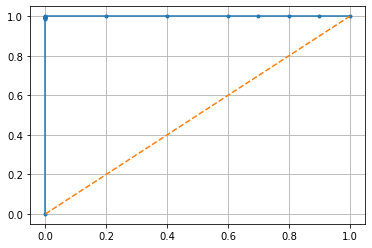

Accuracy : 1.0

ROC AUC Score : 1.0

Conf. Matrix :

 [[  20    0]
 [   0 3750]]

Classification Report :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00      3750

    accuracy                           1.00      3770
   macro avg       1.00      1.00      1.00      3770
weighted avg       1.00      1.00      1.00      3770


Feature Importances :
 [ 19  14   7  27 155   9   0   2   2   2   0   2   7   0   7   1  39  29
 214   0 101 114   0]


In [144]:
lgb.fit(xtrain,ytrain)
lgb_test_pred = lgb.predict(xtest)
lgb_test_pp = lgb.predict_proba(xtest)
lgb_test_pp = lgb_test_pp[:,1]
## roccurve
fpr,tpr,thres = roc_curve(ytest,lgb_test_pp)
plt.plot(fpr,tpr,marker='.',linestyle='-',label='model')
plt.plot([0,1],linestyle='--',label='50% line')
plt.grid()
plt.show()
lgb_test_acc = accuracy_score(ytest,lgb_test_pred)
lgb_conf_mat = confusion_matrix(ytest,lgb_test_pred)
lgb_cr = classification_report(ytest,lgb_test_pred)

print('Accuracy :',lgb_test_acc)
print('\nROC AUC Score :',roc_auc_score(ytest,lgb_test_pp))
print('\nConf. Matrix :\n\n',lgb_conf_mat)
print('\nClassification Report :\n\n',lgb_cr)

print('\nFeature Importances :\n',lgb.feature_importances_)

### Lets now take the Ensemble of all the Good performing models

In [145]:
lr_test_pp = lr_test_pp.tolist()
dt_test_pp = dt_test_pp.tolist()
rf_test_pp = rf_test_pp.tolist()
gb_test_pp = gb_test_pp.tolist()
xgb_test_pp = xgb_test_pp.tolist()
xgbrf_test_pp = xgbrf_test_pp.tolist()
cat_test_pp = cat_test_pp.tolist()
lgb_test_pp = lgb_test_pp.tolist()

In [150]:
mean_proba = pd.DataFrame({'lr':lr_test_pp,'dt':dt_test_pp,'rf':rf_test_pp,'gb':gb_test_pp,
                           'xgb':xgb_test_pp,'xgbrf':xgbrf_test_pp,'cat':cat_test_pp,'lgb':lgb_test_pp})

In [151]:
mean_proba.head()

,lr,dt,rf,gb,xgb,xgbrf,cat,lgb
0,1.000000,1.0,1.0,1.0,0.999960,0.880797,0.999975,1.0
1,1.000000,1.0,1.0,1.0,0.999975,0.880797,0.999970,1.0
2,0.999929,1.0,1.0,1.0,0.999975,0.880797,0.999946,1.0
3,1.000000,1.0,1.0,1.0,0.999975,0.880797,0.999967,1.0
4,1.000000,1.0,1.0,1.0,0.999975,0.880797,0.999944,1.0


In [152]:
mean_probas = []
for i in mean_proba.index:
    mean_probas.append(mean_proba.iloc[i].mean())
mean_proba['mean_probas'] = mean_probas

In [153]:
mean_proba.head()

,lr,dt,rf,gb,xgb,xgbrf,cat,lgb,mean_probas
0,1.000000,1.0,1.0,1.0,0.999960,0.880797,0.999975,1.0,0.985091
1,1.000000,1.0,1.0,1.0,0.999975,0.880797,0.999970,1.0,0.985093
2,0.999929,1.0,1.0,1.0,0.999975,0.880797,0.999946,1.0,0.985081
3,1.000000,1.0,1.0,1.0,0.999975,0.880797,0.999967,1.0,0.985092
4,1.000000,1.0,1.0,1.0,0.999975,0.880797,0.999944,1.0,0.985089


In [154]:
fpr,tpr,thres = roc_curve(ytest,mean_proba.mean_probas)

ROC AUC Score : 0.9999999999999999


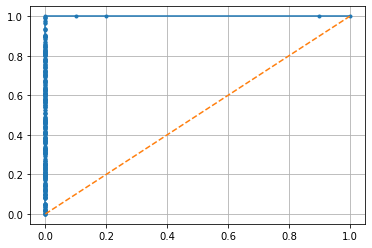

In [168]:
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
print('ROC AUC Score :',roc_auc_score(ytest,mean_proba.mean_probas))
plt.show()

In [161]:
acc=[]
for i in thres:
    ypred = np.where(mean_probas > i,1,0)
    acc.append(accuracy_score(ytest,ypred))
    
decider = pd.concat([pd.Series(thres),pd.Series(acc)],axis=1)
decider.rename(columns = {0: 'Threshold', 1: 'Accuracies'}, inplace = True)
decider.sort_values('Accuracies',ascending=False).head(10)

,Threshold,Accuracies
410,0.030739,0.999735
409,0.979649,0.999735
411,0.028369,0.999469
408,0.982576,0.996817
407,0.982591,0.996021
412,0.017280,0.995491
413,0.016976,0.995225
406,0.983553,0.989920
405,0.983616,0.989655
404,0.985029,0.977454


In [179]:
threshold = thres[410]

In [180]:
threshold

0.030738510306659132

In [181]:
final_results = []
for i in mean_proba.mean_probas:
    if i > threshold:
        final_results.append(1)
    else:
        final_results.append(0)

In [185]:
print('\nAccuracy :',round(accuracy_score(ytest,final_results),4))
print('\nConfusion Matrix :\n\n',confusion_matrix(ytest,final_results))
print(classification_report(ytest,final_results))


Accuracy : 0.9997

Confusion Matrix :

 [[  19    1]
 [   0 3750]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       1.00      1.00      1.00      3750

    accuracy                           1.00      3770
   macro avg       1.00      0.97      0.99      3770
weighted avg       1.00      1.00      1.00      3770



### Despite the Data being Imballanced vastly imbalanced, We have achived an F1 score if 0.97 for the 0 class. This was possible purely because of the analysis we did!